In [1]:
import pandas as pd
import numpy as np
import sys
from google.colab import drive
drive.mount(f'/content/drive')
sys.path.append('/content/drive/My Drive/Colab Notebooks/DL')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [157]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [184]:
# three datasets are imported because data was scraped three times in three different files.
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Web Scraping/boat_bassheads900_reviews.csv')
data1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Web Scraping/boat_bassheads900_reviews_1.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Web Scraping/boat_bassheads900_reviews_2.csv')
data3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Web Scraping/boat_bassheads900_reviews_3.csv')

In [34]:
# data = data.append(data1, ignore_index = True)
# data = data.append(data2, ignore_index = True)
# data = data.append(data3, ignore_index = True)

In [185]:
data = pd.concat([data, data1, data2, data3], ignore_index = True)

In [186]:
data['rating'].value_counts()

4.0 out of 5 stars    753
3.0 out of 5 stars    615
5.0 out of 5 stars    475
2.0 out of 5 stars    140
1.0 out of 5 stars    114
Name: rating, dtype: int64

In [187]:
data.duplicated().sum()

134

In [188]:
data = data.drop_duplicates()

In [189]:
data['rating'].value_counts()

4.0 out of 5 stars    678
3.0 out of 5 stars    597
5.0 out of 5 stars    435
2.0 out of 5 stars    140
1.0 out of 5 stars    113
Name: rating, dtype: int64

In [190]:
data['rating'] = data['rating'].apply(lambda x: x.split()[0].split('.')[0])

In [191]:
data['rating']

0       4
1       4
2       4
3       4
4       4
       ..
2092    2
2093    3
2094    2
2095    3
2096    2
Name: rating, Length: 1963, dtype: object

In [192]:
data = data.astype({'rating':'int64'})

In [193]:
ndf = data.copy()

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2096
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1963 non-null   object
 1   rating  1963 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 46.0+ KB


In [195]:
data.head()

,review,rating
0,Its just fine and has lifespan of 1 year only ...,4
1,"For this price point ,this headphone is a grea...",4
2,Best experience ever in headphones I’ve used t...,4
3,overall is good,4
4,Bass Quality and sound is great,4


In [196]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer
from imblearn.under_sampling import RandomUnderSampler
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [197]:
def clean(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[""''_]', '', text)
    text = re.sub('\n', '', text)
    return text

def decontract_text(text):
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"won\’t", "will not", text)
    text = re.sub(r"can\’t", "can not", text)
    text = re.sub(r"\'t've", " not have", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'clock", "f the clock", text)
    text = re.sub(r"\'cause", " because", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"n\’t", " not", text)
    text = re.sub(r"\’re", " are", text)
    text = re.sub(r"\’s", " is", text)
    text = re.sub(r"\’d", " would", text)
    text = re.sub(r"\’ll", " will", text)
    text = re.sub(r"\’t", " not", text)
    text = re.sub(r"\’ve", " have", text)
    text = re.sub(r"\’m", " am", text)
    return text

def final_clean(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    stop = set(stopwords.words('english'))
    filtered_words = [word for word in text.split() if word not in stop]
    ps = LancasterStemmer()
    text = [ps.stem(word) for word in filtered_words]
    text = ' '.join(text)
    return text

In [198]:
data['review'] = data['review'].apply(lambda text: decontract_text(text))
data['review'] = data['review'].apply(lambda text: clean(text))
data['review'] = data['review'].apply(lambda text: final_clean(text))

In [199]:
data['review']

0       fin lifesp year gre year mic headphon stop wor...
1       pric point headphon gre steal us headphon dai ...
2       best expery ev headphon us til sup sound qual ...
3                                             overal good
4                                     bass qual sound gre
                              ...                        
2092              produc qual got fail within three month
2093    first produc defect replac got nic produc got ...
2094    poor connect nee toggl connect jack rep okay l...
2095    overal produc good nic sound qual jack good us...
2096                             originalit duply orgvert
Name: review, Length: 1963, dtype: object

In [200]:
vec = CountVectorizer()
X = vec.fit_transform(data["review"])
X

<1963x3368 sparse matrix of type '<class 'numpy.int64'>'
	with 26320 stored elements in Compressed Sparse Row format>

In [201]:
df = pd.DataFrame(X.toarray(),columns=vec.get_feature_names_out())

In [202]:
data['rating'].value_counts()

4    678
3    597
5    435
2    140
1    113
Name: rating, dtype: int64

In [203]:
data['sentiment'] = data['rating'].apply(lambda x: 1 if x>3 else 0)

In [204]:
data

,review,rating,sentiment
0,fin lifesp year gre year mic headphon stop wor...,4,1
1,pric point headphon gre steal us headphon dai ...,4,1
2,best expery ev headphon us til sup sound qual ...,4,1
3,overal good,4,1
4,bass qual sound gre,4,1
...,...,...,...
2092,produc qual got fail within three month,2,0
2093,first produc defect replac got nic produc got ...,3,0
2094,poor connect nee toggl connect jack rep okay l...,2,0
2095,overal produc good nic sound qual jack good us...,3,0


In [205]:
data['sentiment'].value_counts()

1    1113
0     850
Name: sentiment, dtype: int64

In [209]:
y = data['sentiment']

In [210]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df,y,test_size=0.3, stratify = y)

In [211]:
print(ytrain.value_counts())
print(ytest.value_counts())

1    779
0    595
Name: sentiment, dtype: int64
1    334
0    255
Name: sentiment, dtype: int64


In [212]:
print(Xtrain.shape, Xtest.shape)
print(ytrain.shape, ytest.shape)

(1374, 3368) (589, 3368)
(1374,) (589,)


In [227]:
def print_acc(Ptrain,Ptest,ytrain,ytest):
    print('------------------------------------------------------------------------------|')
    print(f'|  Training Accuracy \n| {classification_report(ytrain, Ptrain)} |')
    #print('------------------------------------------------------------------------------|')
    #print(f'|  Test Accuracy     \n| {classification_report(ytest, Ptest)} |')
    print('------------------------------------------------------------------------------|')

def gen_conf(actual,pred):
    classes = [0,1]
    cm = confusion_matrix(actual,pred, labels=classes)
    sn.heatmap(cm, annot=True)
    plt.title("Confusion matrix")
    plt.show()

------------------------------------------------------------------------------|
|  Training Accuracy 
|               precision    recall  f1-score   support

           0       0.89      0.86      0.87       595
           1       0.89      0.92      0.91       779

    accuracy                           0.89      1374
   macro avg       0.89      0.89      0.89      1374
weighted avg       0.89      0.89      0.89      1374
 |
------------------------------------------------------------------------------|


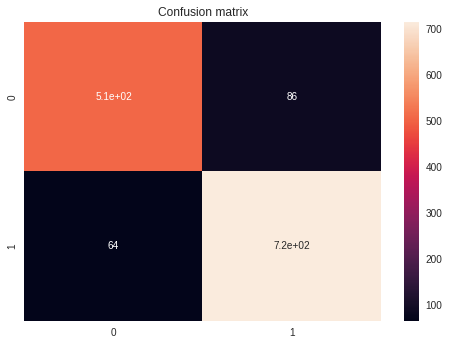

In [228]:
clf = svm.SVC(class_weight = 'balanced')
clf.fit(Xtrain, ytrain)
trpred = clf.predict(Xtrain)
tpred = clf.predict(Xtest)
print_acc(trpred, tpred, ytrain, ytest)
gen_conf(ytrain, trpred)

------------------------------------------------------------------------------|
|  Training Accuracy 
|               precision    recall  f1-score   support

           0       0.61      1.00      0.76       595
           1       1.00      0.51      0.68       779

    accuracy                           0.72      1374
   macro avg       0.81      0.76      0.72      1374
weighted avg       0.83      0.72      0.71      1374
 |
------------------------------------------------------------------------------|


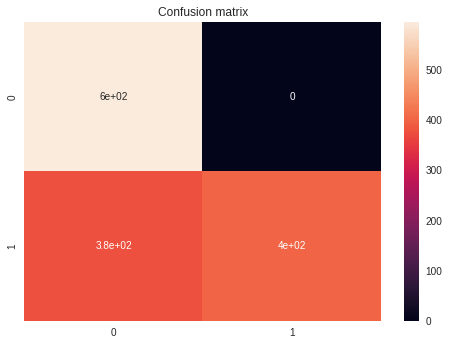

In [229]:
gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)
#print_acc(gnb, Xtrain, Xtest, ytrain, ytest)
trpred = gnb.predict(Xtrain)
tpred = gnb.predict(Xtest)
print_acc(trpred, tpred, ytrain, ytest)
gen_conf(ytrain, trpred)

------------------------------------------------------------------------------|
|  Training Accuracy 
|               precision    recall  f1-score   support

           0       0.91      0.76      0.83       595
           1       0.84      0.94      0.88       779

    accuracy                           0.86      1374
   macro avg       0.87      0.85      0.85      1374
weighted avg       0.87      0.86      0.86      1374
 |
------------------------------------------------------------------------------|


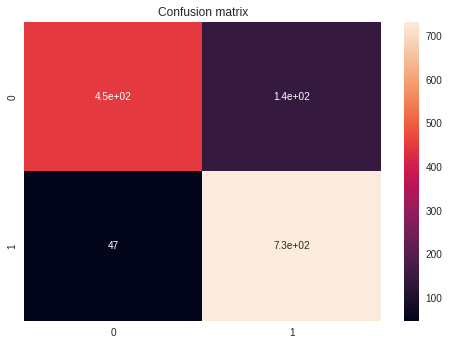

In [230]:
mnb = MultinomialNB()
mnb.fit(Xtrain, ytrain)
trpred = mnb.predict(Xtrain)
tpred = mnb.predict(Xtest)
print_acc(trpred, tpred, ytrain, ytest)
gen_conf(ytrain, trpred)

------------------------------------------------------------------------------|
|  Training Accuracy 
|               precision    recall  f1-score   support

           0       0.98      0.97      0.98       595
           1       0.98      0.99      0.98       779

    accuracy                           0.98      1374
   macro avg       0.98      0.98      0.98      1374
weighted avg       0.98      0.98      0.98      1374
 |
------------------------------------------------------------------------------|


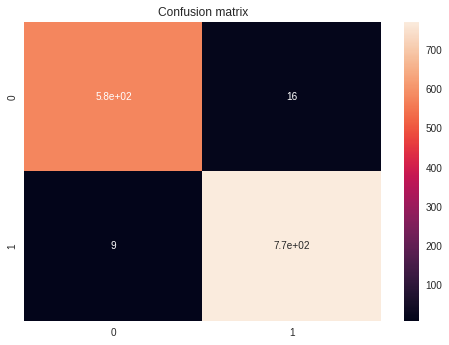

In [231]:
dtc = DecisionTreeClassifier()
dtc.fit(Xtrain, ytrain)
trpred = dtc.predict(Xtrain)
tpred = dtc.predict(Xtest)
print_acc(trpred, tpred, ytrain, ytest)
gen_conf(ytrain, trpred)

------------------------------------------------------------------------------|
|  Training Accuracy 
|               precision    recall  f1-score   support

           0       0.80      0.48      0.60       595
           1       0.70      0.91      0.79       779

    accuracy                           0.72      1374
   macro avg       0.75      0.70      0.70      1374
weighted avg       0.74      0.72      0.71      1374
 |
------------------------------------------------------------------------------|


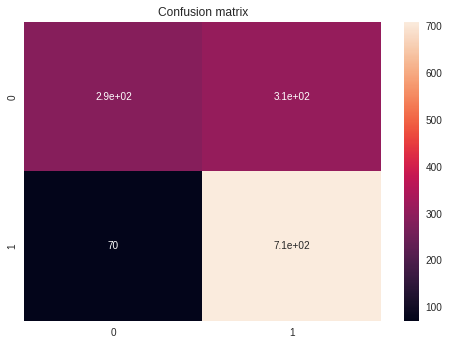

In [232]:
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)
trpred = knn.predict(Xtrain)
tpred = knn.predict(Xtest)
print_acc(trpred, tpred, ytrain, ytest)
gen_conf(ytrain, trpred)

------------------------------------------------------------------------------|
|  Training Accuracy 
|               precision    recall  f1-score   support

           0       0.97      0.35      0.52       595
           1       0.67      0.99      0.80       779

    accuracy                           0.72      1374
   macro avg       0.82      0.67      0.66      1374
weighted avg       0.80      0.72      0.68      1374
 |
------------------------------------------------------------------------------|


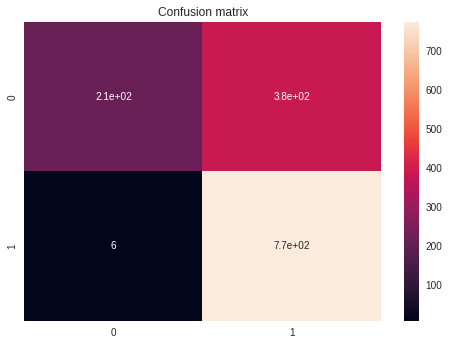

In [233]:
rfc = RandomForestClassifier(n_jobs = -1, max_depth = 10, n_estimators = 50)
rfc.fit(Xtrain, ytrain)
trpred = rfc.predict(Xtrain)
tpred = rfc.predict(Xtest)
print_acc(trpred, tpred, ytrain, ytest)
gen_conf(ytrain, trpred)

So, here we can see that the SVM and RandomForest classifiers are giving better results. 